<a href="https://colab.research.google.com/github/PrateekCoder/lets_data_science/blob/main/Lasso_Regression_Harnessing_Machine_Learning_for_Effective_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Wine Quality dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [2]:
X = data.drop('quality', axis=1)
y = data['quality']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

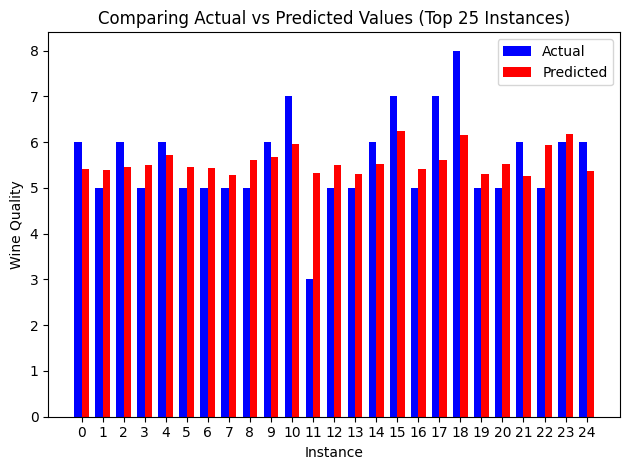

In [6]:
import matplotlib.pyplot as plt

# Predict the values
y_pred = lasso.predict(X_test)

# Number of values to visualize
num_values = 25

# Create an array with the number of values
index = np.arange(num_values)

# Bar width
bar_width = 0.35

# Plot the actual values
plt.bar(index, y_test[:num_values], bar_width, color='b', label='Actual')

# Plot the predicted values
plt.bar(index + bar_width, y_pred[:num_values], bar_width, color='r', label='Predicted')

# Setup the graph
plt.xlabel('Instance')
plt.ylabel('Wine Quality')
plt.title('Comparing Actual vs Predicted Values (Top 25 Instances)')
plt.xticks(index + bar_width / 2, np.array([i for i in range(num_values)]))
plt.legend()

# Show the graph
plt.tight_layout()
plt.show()

In [7]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.438864362387304


In [8]:
print(pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients']))

                      Coefficients
fixed acidity             0.000000
volatile acidity         -0.143731
citric acid               0.000000
residual sugar           -0.000000
chlorides                -0.000000
free sulfur dioxide      -0.000000
total sulfur dioxide     -0.000000
density                  -0.000000
pH                       -0.000000
sulphates                 0.035185
alcohol                   0.249276
